<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Informe_Proyecto_ML_Estres_en_Estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo para el Informe del Proyecto Final de ML sobre Prdictores de Estrés en Estudiantes

In [ ]:
import pandas as pd

# Cargamos el dataset
dataset = pd.read_csv('/content/StressLevelDataset.csv')

# Mostramos los primeros registros para tener una idea de su contenido
dataset.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de Seaborn para las gráficas
sns.set_style("whitegrid")

# Información básica del dataset
info = dataset.info()

# Resumen estadístico
summary = dataset.describe()

# Verificación de valores nulos
null_values = dataset.isnull().sum()

info, summary, null_values


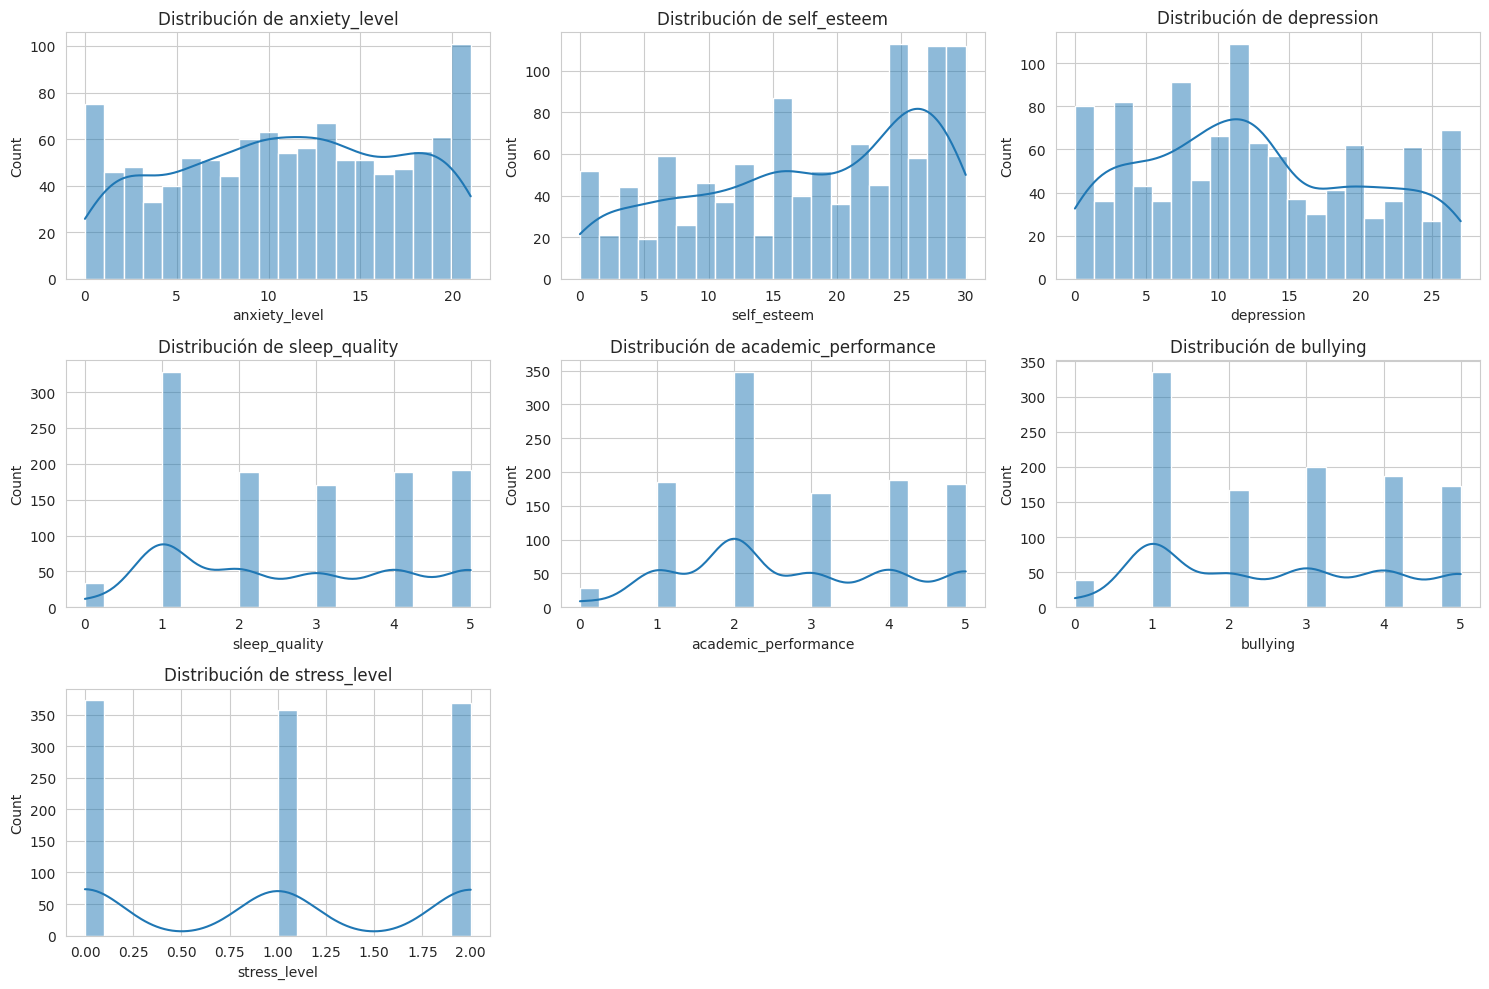

In [ ]:
# Seleccionamos algunas columnas clave para visualizar
columns_to_plot = ['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance', 'bullying', 'stress_level']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset[column], kde=True, bins=20)
    plt.title(f'Distribución de {column}')
    plt.tight_layout()

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividimos el dataset en características (X) y variable objetivo (y)
X = dataset.drop('stress_level', axis=1)
y = dataset['stress_level']

# Normalizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((880, 20), (220, 20))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inicializamos y entrenamos el modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, class_report


(0.8681818181818182,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.88      0.86        76\n           1       0.89      0.86      0.88        73\n           2       0.88      0.86      0.87        71\n\n    accuracy                           0.87       220\n   macro avg       0.87      0.87      0.87       220\nweighted avg       0.87      0.87      0.87       220\n')

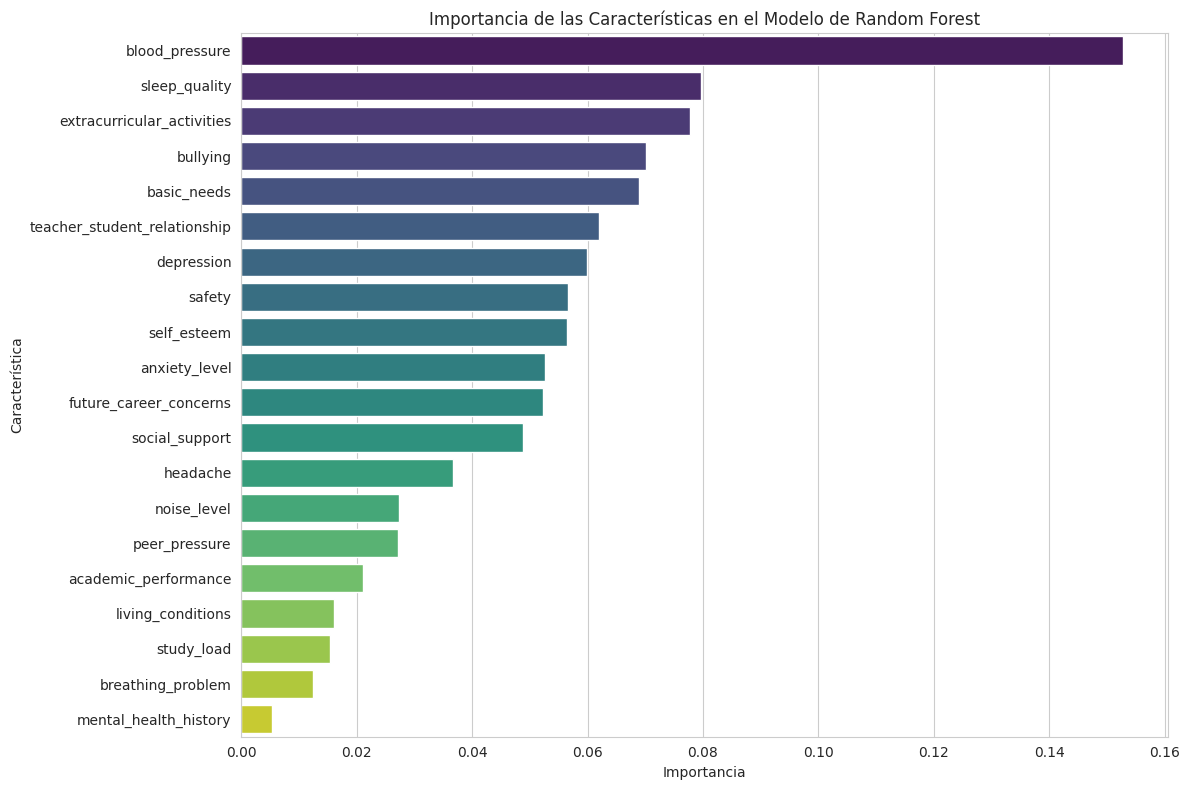

In [ ]:
# Cargamos nuevamente el dataset y las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

dataset = pd.read_csv('/content/StressLevelDataset.csv')

# Dividimos el dataset en características (X) y variable objetivo (y)
X = dataset.drop('stress_level', axis=1)
y = dataset['stress_level']

# Normalizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenamos el modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Extraemos la importancia de las características
feature_importances = rf_classifier.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualizamos la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Importancia de las Características en el Modelo de Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 1. Cargar el dataset
dataset = pd.read_csv('/content/StressLevelDataset.csv')  # Asegúrate de que la ruta del archivo sea correcta

# 2. Preparar los datos
X = dataset.drop('stress_level', axis=1)
y = dataset['stress_level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Entrenar el modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_scaled, y)

# 4. Obtener la importancia de las características
feature_importances = rf_classifier.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 5. Ordenar las características por su importancia
features_df_sorted = features_df.sort_values(by='Importance', ascending=False)

features_df_sorted.to_excel("/content/features_importance.xlsx", index=False)

print(features_df_sorted)


                         Feature  Importance
5                 blood_pressure    0.178220
6                  sleep_quality    0.079069
11                   basic_needs    0.063954
10                        safety    0.063777
3                     depression    0.063207
1                    self_esteem    0.061584
12          academic_performance    0.061436
15        future_career_concerns    0.057073
16                social_support    0.053195
0                  anxiety_level    0.050663
18    extracurricular_activities    0.044671
14  teacher_student_relationship    0.043384
4                       headache    0.039769
19                      bullying    0.038295
17                 peer_pressure    0.038077
8                    noise_level    0.019888
13                    study_load    0.015498
7              breathing_problem    0.011981
9              living_conditions    0.011208
2          mental_health_history    0.005052


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 1. Cargar el dataset
dataset = pd.read_csv('/content/StressLevelDataset.csv')  # Reemplaza 'RUTA_DEL_ARCHIVO.csv' con la ruta donde tengas el dataset

# 2. Preparar los datos
X = dataset.drop('stress_level', axis=1)
y = dataset['stress_level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Entrenar el modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_scaled, y)

# 4. Obtener la importancia de las características
feature_importances = rf_classifier.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)

# 5. Filtrar las características de interés y mostrar sus importancias
specific_features = [
    'anxiety_level', 'depression', 'self_esteem', 'sleep_quality',
    'peer_pressure', 'academic_performance', 'future_career_concerns'
]
print(features_df[features_df['Feature'].isin(specific_features)])


                   Feature  Importance
6            sleep_quality    0.079069
3               depression    0.063207
1              self_esteem    0.061584
12    academic_performance    0.061436
15  future_career_concerns    0.057073
0            anxiety_level    0.050663
17           peer_pressure    0.038077
